### Importing Packages

In [175]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
from torch.autograd import Variable
from sklearn.preprocessing import MinMaxScaler

#### Importing the Data

In [176]:
df = pd.read_csv('Train_TEC_mar17.csv')

In [177]:
df.head()

,Date,Month,Year,Time,LT,TEC
0,1,3,2017,0.016389,5.311333,2.067562
1,1,3,2017,0.049722,5.344670,2.082707
2,1,3,2017,0.083056,5.378006,2.004272
3,1,3,2017,0.116389,5.411343,1.736569
4,1,3,2017,0.149722,5.444679,1.758503


#### Dropping Useless columns

In [178]:
df.drop(["Date","Month","Year","Time","LT"], axis = 1, inplace = True)

In [179]:
df.head()

,TEC
0,2.067562
1,2.082707
2,2.004272
3,1.736569
4,1.758503


#### Converting it into a ndarray

In [180]:
training_set = df.iloc[:,:].values

In [181]:
type(training_set), training_set.shape

(numpy.ndarray, (14400, 1))

#### Plotting the Data

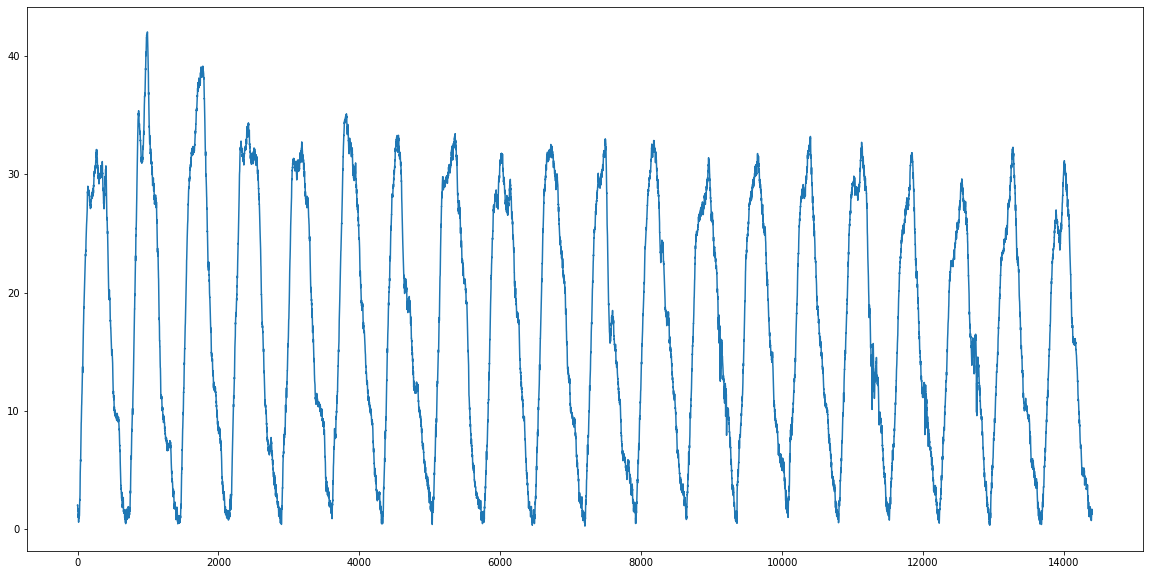

In [182]:
plt.figure(figsize=(20,10))

plt.plot(training_set, label = 'TEC Values')
plt.show()

#### Making Data Sequential for look back

In [183]:
def sliding_windows(data, seq_length):
    x = []
    y = []

    for i in range(len(data)-seq_length-1):
        _x = data[i:(i+seq_length)]
        _y = data[i+seq_length]
        x.append(_x)
        y.append(_y)

    return np.array(x),np.array(y)

sc = MinMaxScaler()

training_data = sc.fit_transform(training_set)

seq_length = 4
x, y = sliding_windows(training_data, seq_length)

train_size = int(len(y) * 0.90)
test_size = len(y) - train_size

dataX = Variable(torch.Tensor(np.array(x)))
dataY = Variable(torch.Tensor(np.array(y)))

trainX = Variable(torch.Tensor(np.array(x[0:train_size])))
trainY = Variable(torch.Tensor(np.array(y[0:train_size])))

testX = Variable(torch.Tensor(np.array(x[train_size:len(x)])))
testY = Variable(torch.Tensor(np.array(y[train_size:len(y)])))

In [184]:
training_data[-5:],x[0].shape, x[0], x[1], y

(array([[0.03427839],
        [0.03276266],
        [0.02464814],
        [0.02412893],
        [0.03227832]]),
 (4, 1),
 array([[0.04266831],
        [0.04303103],
        [0.04115251],
        [0.03474105]]),
 array([[0.04303103],
        [0.04115251],
        [0.03474105],
        [0.03526637]]),
 array([[0.03526637],
        [0.03025557],
        [0.03485417],
        ...,
        [0.03276266],
        [0.02464814],
        [0.02412893]]))

In [185]:
class LSTM(nn.Module):

    def __init__(self, num_classes, input_size, hidden_size, num_layers):
        super(LSTM, self).__init__()
        
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.seq_length = seq_length
        
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True)
        
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        h_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size))
        
        c_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size))
        
        ula, (h_out, _) = self.lstm(x, (h_0, c_0))
        
        h_out = h_out.view(-1, self.hidden_size)
        
        out = self.fc(h_out)
        
        return out

In [186]:
num_epochs = 1000
learning_rate = 0.01

input_size = 1
hidden_size = 2
num_layers = 1

num_classes = 1

lstm = LSTM(num_classes, input_size, hidden_size, num_layers)

criterion = torch.nn.MSELoss()   
optimizer = torch.optim.Adam(lstm.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    outputs = lstm(trainX)
    optimizer.zero_grad()
    
    loss = criterion(outputs, trainY)
    
    loss.backward()
    
    optimizer.step()
    if epoch % 1 == 0:
      print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))

Epoch: 0, loss: 0.28856
Epoch: 1, loss: 0.26847
Epoch: 2, loss: 0.25025
Epoch: 3, loss: 0.23377
Epoch: 4, loss: 0.21888
Epoch: 5, loss: 0.20542
Epoch: 6, loss: 0.19323
Epoch: 7, loss: 0.18219
Epoch: 8, loss: 0.17214
Epoch: 9, loss: 0.16296
Epoch: 10, loss: 0.15456
Epoch: 11, loss: 0.14682
Epoch: 12, loss: 0.13967
Epoch: 13, loss: 0.13305
Epoch: 14, loss: 0.12690
Epoch: 15, loss: 0.12119
Epoch: 16, loss: 0.11587
Epoch: 17, loss: 0.11092
Epoch: 18, loss: 0.10634
Epoch: 19, loss: 0.10209
Epoch: 20, loss: 0.09818
Epoch: 21, loss: 0.09461
Epoch: 22, loss: 0.09136
Epoch: 23, loss: 0.08844
Epoch: 24, loss: 0.08584
Epoch: 25, loss: 0.08357
Epoch: 26, loss: 0.08161
Epoch: 27, loss: 0.07997
Epoch: 28, loss: 0.07862
Epoch: 29, loss: 0.07754
Epoch: 30, loss: 0.07670
Epoch: 31, loss: 0.07606
Epoch: 32, loss: 0.07558
Epoch: 33, loss: 0.07520
Epoch: 34, loss: 0.07487
Epoch: 35, loss: 0.07454
Epoch: 36, loss: 0.07418
Epoch: 37, loss: 0.07374
Epoch: 38, loss: 0.07322
Epoch: 39, loss: 0.07263
Epoch: 40,

Epoch: 319, loss: 0.00036
Epoch: 320, loss: 0.00036
Epoch: 321, loss: 0.00036
Epoch: 322, loss: 0.00036
Epoch: 323, loss: 0.00036
Epoch: 324, loss: 0.00035
Epoch: 325, loss: 0.00035
Epoch: 326, loss: 0.00035
Epoch: 327, loss: 0.00035
Epoch: 328, loss: 0.00035
Epoch: 329, loss: 0.00035
Epoch: 330, loss: 0.00035
Epoch: 331, loss: 0.00035
Epoch: 332, loss: 0.00035
Epoch: 333, loss: 0.00035
Epoch: 334, loss: 0.00035
Epoch: 335, loss: 0.00034
Epoch: 336, loss: 0.00034
Epoch: 337, loss: 0.00034
Epoch: 338, loss: 0.00034
Epoch: 339, loss: 0.00034
Epoch: 340, loss: 0.00034
Epoch: 341, loss: 0.00034
Epoch: 342, loss: 0.00034
Epoch: 343, loss: 0.00034
Epoch: 344, loss: 0.00034
Epoch: 345, loss: 0.00034
Epoch: 346, loss: 0.00033
Epoch: 347, loss: 0.00033
Epoch: 348, loss: 0.00033
Epoch: 349, loss: 0.00033
Epoch: 350, loss: 0.00033
Epoch: 351, loss: 0.00033
Epoch: 352, loss: 0.00033
Epoch: 353, loss: 0.00033
Epoch: 354, loss: 0.00033
Epoch: 355, loss: 0.00033
Epoch: 356, loss: 0.00033
Epoch: 357, 

Epoch: 637, loss: 0.00018
Epoch: 638, loss: 0.00018
Epoch: 639, loss: 0.00017
Epoch: 640, loss: 0.00017
Epoch: 641, loss: 0.00017
Epoch: 642, loss: 0.00017
Epoch: 643, loss: 0.00017
Epoch: 644, loss: 0.00017
Epoch: 645, loss: 0.00017
Epoch: 646, loss: 0.00017
Epoch: 647, loss: 0.00017
Epoch: 648, loss: 0.00017
Epoch: 649, loss: 0.00017
Epoch: 650, loss: 0.00017
Epoch: 651, loss: 0.00017
Epoch: 652, loss: 0.00017
Epoch: 653, loss: 0.00017
Epoch: 654, loss: 0.00017
Epoch: 655, loss: 0.00017
Epoch: 656, loss: 0.00017
Epoch: 657, loss: 0.00017
Epoch: 658, loss: 0.00017
Epoch: 659, loss: 0.00017
Epoch: 660, loss: 0.00017
Epoch: 661, loss: 0.00017
Epoch: 662, loss: 0.00017
Epoch: 663, loss: 0.00017
Epoch: 664, loss: 0.00017
Epoch: 665, loss: 0.00017
Epoch: 666, loss: 0.00017
Epoch: 667, loss: 0.00017
Epoch: 668, loss: 0.00017
Epoch: 669, loss: 0.00017
Epoch: 670, loss: 0.00017
Epoch: 671, loss: 0.00017
Epoch: 672, loss: 0.00017
Epoch: 673, loss: 0.00016
Epoch: 674, loss: 0.00016
Epoch: 675, 

Epoch: 952, loss: 0.00011
Epoch: 953, loss: 0.00011
Epoch: 954, loss: 0.00011
Epoch: 955, loss: 0.00011
Epoch: 956, loss: 0.00011
Epoch: 957, loss: 0.00011
Epoch: 958, loss: 0.00011
Epoch: 959, loss: 0.00011
Epoch: 960, loss: 0.00011
Epoch: 961, loss: 0.00011
Epoch: 962, loss: 0.00011
Epoch: 963, loss: 0.00011
Epoch: 964, loss: 0.00011
Epoch: 965, loss: 0.00011
Epoch: 966, loss: 0.00011
Epoch: 967, loss: 0.00011
Epoch: 968, loss: 0.00011
Epoch: 969, loss: 0.00011
Epoch: 970, loss: 0.00011
Epoch: 971, loss: 0.00011
Epoch: 972, loss: 0.00011
Epoch: 973, loss: 0.00011
Epoch: 974, loss: 0.00011
Epoch: 975, loss: 0.00011
Epoch: 976, loss: 0.00011
Epoch: 977, loss: 0.00011
Epoch: 978, loss: 0.00011
Epoch: 979, loss: 0.00011
Epoch: 980, loss: 0.00011
Epoch: 981, loss: 0.00011
Epoch: 982, loss: 0.00011
Epoch: 983, loss: 0.00011
Epoch: 984, loss: 0.00011
Epoch: 985, loss: 0.00011
Epoch: 986, loss: 0.00011
Epoch: 987, loss: 0.00011
Epoch: 988, loss: 0.00011
Epoch: 989, loss: 0.00011
Epoch: 990, 

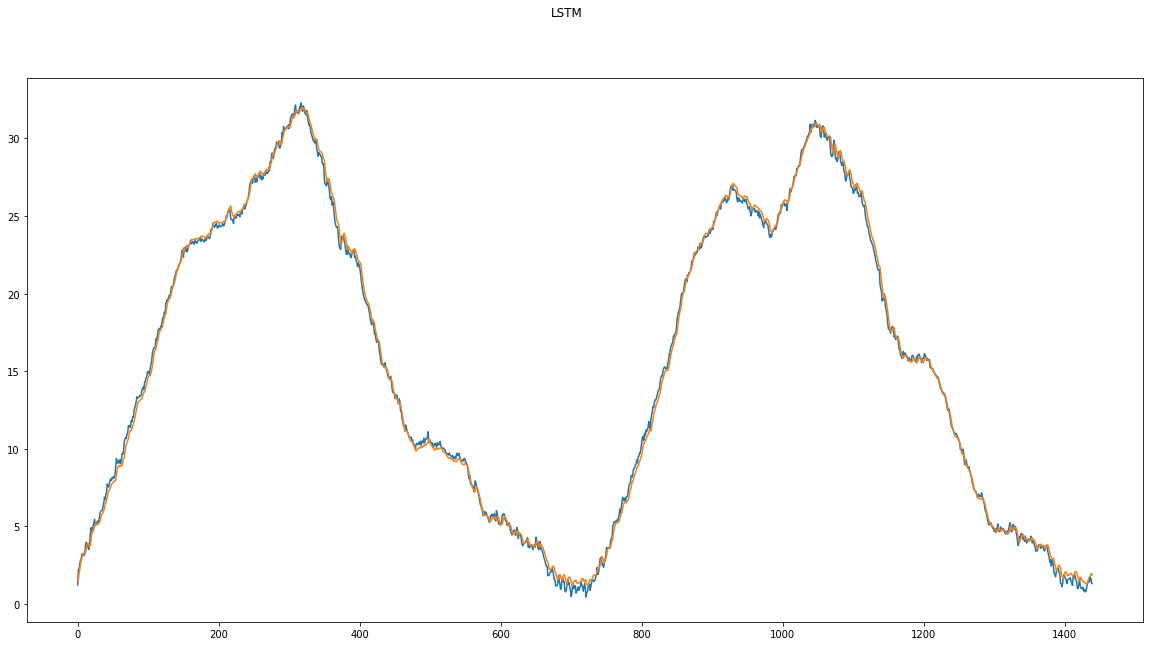

In [187]:
lstm.eval()
train_predict = lstm(dataX)

data_predict = train_predict.data.numpy()
dataY_plot = dataY.data.numpy()

data_predict = sc.inverse_transform(data_predict)
dataY_plot = sc.inverse_transform(dataY_plot)


plt.figure(figsize=(20,10))

plt.plot(dataY_plot[-1440:])
plt.plot(data_predict[-1440:])
plt.suptitle('LSTM')
plt.show()

In [188]:
train_predict.shape

torch.Size([14395, 1])

In [189]:
dataY_plot.shape

(14395, 1)

In [190]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(dataY_plot, data_predict))

rms

0.4247174403602876